In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = 15,10


In [2]:
cols_list=['baseline_name','baseline_type']
movement_df = pd.read_csv("data/movement_ken.csv")
movement_df.tail()

,Unnamed: 0,ds,country,polygon_source,polygon_id,polygon_name,all_day_bing_tiles_visited_relative_change,all_day_ratio_single_tile_users,baseline_name,baseline_type
21660,2592445,2020-12-10,KEN,GADM,KEN.9.1_1,Isiolo North,-0.04408,0.15741,full_february,DAY_OF_WEEK
21661,2592446,2020-12-11,KEN,GADM,KEN.9.1_1,Isiolo North,0.01453,0.16013,full_february,DAY_OF_WEEK
21662,2592447,2020-12-16,KEN,GADM,KEN.9.1_1,Isiolo North,0.12100,0.11263,full_february,DAY_OF_WEEK
21663,2592448,2020-12-18,KEN,GADM,KEN.9.1_1,Isiolo North,0.12762,0.15152,full_february,DAY_OF_WEEK
21664,2592449,2020-12-29,KEN,GADM,KEN.9.1_1,Isiolo North,0.02708,0.15896,full_february,DAY_OF_WEEK


In [3]:
counties_df = pd.read_csv('data/other_subcounties_counties.csv')
counties_df.head()

,Unnamed: 0,county,constituencies
0,0,MOMBASA,CHANGAMWE
1,1,MOMBASA,JOMVU
2,2,MOMBASA,KISAUNI
3,3,MOMBASA,LIKONI
4,4,MOMBASA,MVITA (MOMBASA)


In [4]:
population_df = pd.read_csv("data/region_pop.csv")
population_df['region_name'] = population_df['region_name'].str.upper()
population_df.tail()

,region_name,male_population,female_population,intersex_population,total_population,population_density
392,MAKADARA,96369.0,93157.0,NaN,189536.0,16150.0
393,MATHARE,106522.0,100028.0,NaN,206564.0,68940.0
394,NJIRU,307642.0,318809.0,NaN,626482.0,4821.0
395,STAREHE,109173.0,101238.0,NaN,210423.0,10205.0
396,WESTLANDS,153818.0,155021.0,NaN,308854.0,3167.0


In [5]:
economic_df = pd.read_excel('data/economic_county.xlsx')
economic_df.columns = economic_df.iloc[0]
economic_df = economic_df.iloc[1:]
economic_df.head()

,Coun- ty Code,County Name,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,Electricity supply,Water supply; waste collection,Construction,Wholesale and retail trade; repair of motor vehicles,Transport and storage,...,Informa- tion and communi- cation,Financial and insurance activities,Real estate activities,"Profes- sional, technical and support services",Public admin- istration and defence,Education,Human health and social work activities,Other service activities,FISIM1,Total
1,1,MOMBASA,1459,1158,47348,20546,1078,37168,36912,88308,...,5413,31155,35526,7124,12024,4229,4539,2379,-17026,332122
2,2,KWALE,39610,1447,300,730,513,3184,5051,4198,...,879,4941,5733,349,4566,5384,1575,1647,-526,86278
3,3,KILIFI,38319,3334,8456,1471,1353,2233,6037,11411,...,2423,8659,14511,286,6452,9219,2539,2810,-1329,119295
4,4,TANA RIVER,18333,57,11,73,2199,24,3024,924,...,327,2188,752,1,3138,1501,451,608,-158,33498
5,5,LAMU,18699,126,48,340,90,172,2864,4171,...,287,716,1195,10,2129,923,272,257,-167,32386


In [6]:
# merge counties
movement_df['polygon_name'] = movement_df['polygon_name'].str.upper()
movement_merged_df = movement_df.merge(counties_df, how='left', left_on='polygon_name', right_on='constituencies')
movement_merged_df.head()


,Unnamed: 0_x,ds,country,polygon_source,polygon_id,polygon_name,all_day_bing_tiles_visited_relative_change,all_day_ratio_single_tile_users,baseline_name,baseline_type,Unnamed: 0_y,county,constituencies
0,2570785,2020-03-01,KEN,GADM,KEN.10.1_1,KAJIADO CENTRAL,-0.14277,0.16011,full_february,DAY_OF_WEEK,215,KAJIADO,KAJIADO CENTRAL
1,2570786,2020-03-02,KEN,GADM,KEN.10.1_1,KAJIADO CENTRAL,-0.18758,0.09824,full_february,DAY_OF_WEEK,215,KAJIADO,KAJIADO CENTRAL
2,2570787,2020-03-03,KEN,GADM,KEN.10.1_1,KAJIADO CENTRAL,-0.07280,0.12918,full_february,DAY_OF_WEEK,215,KAJIADO,KAJIADO CENTRAL
3,2570788,2020-03-04,KEN,GADM,KEN.10.1_1,KAJIADO CENTRAL,-0.02168,0.10025,full_february,DAY_OF_WEEK,215,KAJIADO,KAJIADO CENTRAL
4,2570789,2020-03-05,KEN,GADM,KEN.10.1_1,KAJIADO CENTRAL,-0.01348,0.11649,full_february,DAY_OF_WEEK,215,KAJIADO,KAJIADO CENTRAL


In [7]:
movement_merged_df = movement_merged_df[['ds', 'polygon_name', 'all_day_bing_tiles_visited_relative_change',
       'all_day_ratio_single_tile_users', 'county']]
movement_merged_df.head()

,ds,polygon_name,all_day_bing_tiles_visited_relative_change,all_day_ratio_single_tile_users,county
0,2020-03-01,KAJIADO CENTRAL,-0.14277,0.16011,KAJIADO
1,2020-03-02,KAJIADO CENTRAL,-0.18758,0.09824,KAJIADO
2,2020-03-03,KAJIADO CENTRAL,-0.07280,0.12918,KAJIADO
3,2020-03-04,KAJIADO CENTRAL,-0.02168,0.10025,KAJIADO
4,2020-03-05,KAJIADO CENTRAL,-0.01348,0.11649,KAJIADO


In [8]:
movement_pop_df = movement_merged_df.merge(population_df, how='left', left_on='polygon_name', right_on='region_name')
movement_pop_df = movement_pop_df[['ds', 'polygon_name', 'all_day_bing_tiles_visited_relative_change',
       'all_day_ratio_single_tile_users', 'county', 'total_population','population_density']]
movement_pop_df

,ds,polygon_name,all_day_bing_tiles_visited_relative_change,all_day_ratio_single_tile_users,county,total_population,population_density
0,2020-03-01,KAJIADO CENTRAL,-0.14277,0.16011,KAJIADO,161862.0,38.0
1,2020-03-02,KAJIADO CENTRAL,-0.18758,0.09824,KAJIADO,161862.0,38.0
2,2020-03-03,KAJIADO CENTRAL,-0.07280,0.12918,KAJIADO,161862.0,38.0
3,2020-03-04,KAJIADO CENTRAL,-0.02168,0.10025,KAJIADO,161862.0,38.0
4,2020-03-05,KAJIADO CENTRAL,-0.01348,0.11649,KAJIADO,161862.0,38.0
...,...,...,...,...,...,...,...
21966,2020-12-10,ISIOLO NORTH,-0.04408,0.15741,ISIOLO,NaN,NaN
21967,2020-12-11,ISIOLO NORTH,0.01453,0.16013,ISIOLO,NaN,NaN
21968,2020-12-16,ISIOLO NORTH,0.12100,0.11263,ISIOLO,NaN,NaN
21969,2020-12-18,ISIOLO NORTH,0.12762,0.15152,ISIOLO,NaN,NaN


In [9]:
movement_economic_df = movement_pop_df.merge(economic_df, how='left', left_on='county', right_on='County Name')
movement_economic_df = movement_economic_df[['ds', 'polygon_name', 'all_day_bing_tiles_visited_relative_change',
       'all_day_ratio_single_tile_users', 'county', 'total_population', 'population_density', 'Total']]

movement_economic_df.columns = ['ds', 'polygon_name', 'all_day_bing_tiles_visited_relative_change',
       'all_day_ratio_single_tile_users', 'county', 'total_population', 'population_density', 'total_gcp']
movement_economic_df.head()

,ds,polygon_name,all_day_bing_tiles_visited_relative_change,all_day_ratio_single_tile_users,county,total_population,population_density,total_gcp
0,2020-03-01,KAJIADO CENTRAL,-0.14277,0.16011,KAJIADO,161862.0,38.0,107805
1,2020-03-02,KAJIADO CENTRAL,-0.18758,0.09824,KAJIADO,161862.0,38.0,107805
2,2020-03-03,KAJIADO CENTRAL,-0.07280,0.12918,KAJIADO,161862.0,38.0,107805
3,2020-03-04,KAJIADO CENTRAL,-0.02168,0.10025,KAJIADO,161862.0,38.0,107805
4,2020-03-05,KAJIADO CENTRAL,-0.01348,0.11649,KAJIADO,161862.0,38.0,107805


In [10]:
population_df

,region_name,male_population,female_population,intersex_population,total_population,population_density
0,BARINGO,336322.0,330428.0,13.0,666763.0,61.0
1,BOMET,434287.0,441379.0,23.0,875689.0,346.0
2,BUNGOMA,812146.0,858389.0,35.0,1670570.0,552.0
3,BUSIA,426252.0,467401.0,28.0,893681.0,527.0
4,ELGEYO-MARAKWET,227317.0,227151.0,12.0,454480.0,150.0
...,...,...,...,...,...,...
392,MAKADARA,96369.0,93157.0,NaN,189536.0,16150.0
393,MATHARE,106522.0,100028.0,NaN,206564.0,68940.0
394,NJIRU,307642.0,318809.0,NaN,626482.0,4821.0
395,STAREHE,109173.0,101238.0,NaN,210423.0,10205.0


In [11]:
population_df[population_df['region_name'].str.contains('ISIOLO')]

,region_name,male_population,female_population,intersex_population,total_population,population_density
8,ISIOLO,139510.0,128483.0,9.0,268002.0,11.0
106,ISIOLO,60414.0,60647.0,NaN,121066.0,45.0


In [12]:
movement_economic_df[movement_economic_df['total_population'].isnull()]

,ds,polygon_name,all_day_bing_tiles_visited_relative_change,all_day_ratio_single_tile_users,county,total_population,population_density,total_gcp
119,2020-03-01,KAJIADO EAST,-0.12344,0.16372,KAJIADO,NaN,NaN,107805
120,2020-03-02,KAJIADO EAST,0.01359,0.13087,KAJIADO,NaN,NaN,107805
121,2020-03-03,KAJIADO EAST,-0.02122,0.12045,KAJIADO,NaN,NaN,107805
122,2020-03-04,KAJIADO EAST,0.00603,0.11899,KAJIADO,NaN,NaN,107805
123,2020-03-05,KAJIADO EAST,0.05006,0.13438,KAJIADO,NaN,NaN,107805
...,...,...,...,...,...,...,...,...
21966,2020-12-10,ISIOLO NORTH,-0.04408,0.15741,ISIOLO,NaN,NaN,15850
21967,2020-12-11,ISIOLO NORTH,0.01453,0.16013,ISIOLO,NaN,NaN,15850
21968,2020-12-16,ISIOLO NORTH,0.12100,0.11263,ISIOLO,NaN,NaN,15850
21969,2020-12-18,ISIOLO NORTH,0.12762,0.15152,ISIOLO,NaN,NaN,15850


## Distribution of movement
Analysis will be based on counties so let's check the distribution of movement per county.

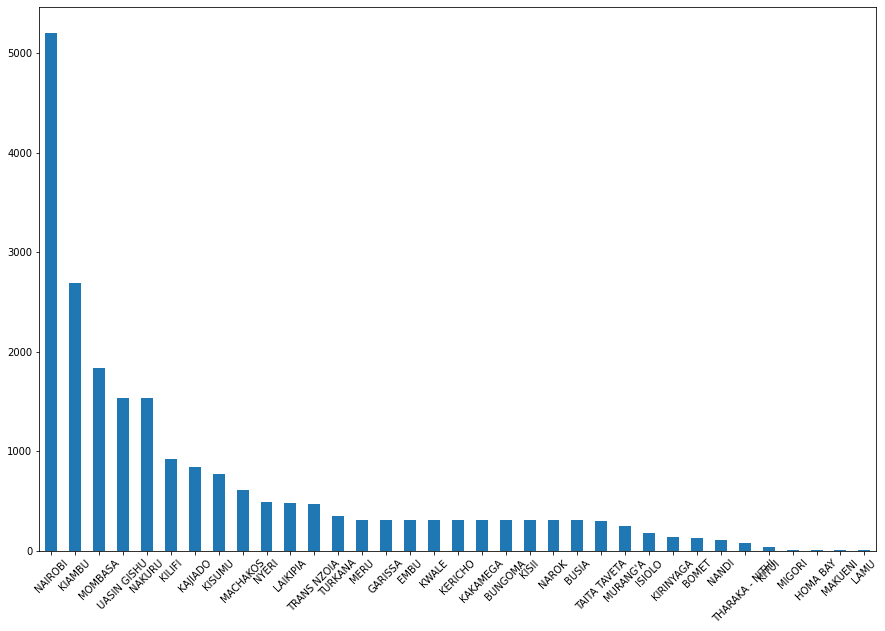

In [13]:
movement_economic_df['county'].value_counts().plot(kind='bar')
_ = plt.xticks(rotation=45)

The dataset is heavily imbalanced. This might bring up bias when trying to understand how other factors affect movement.

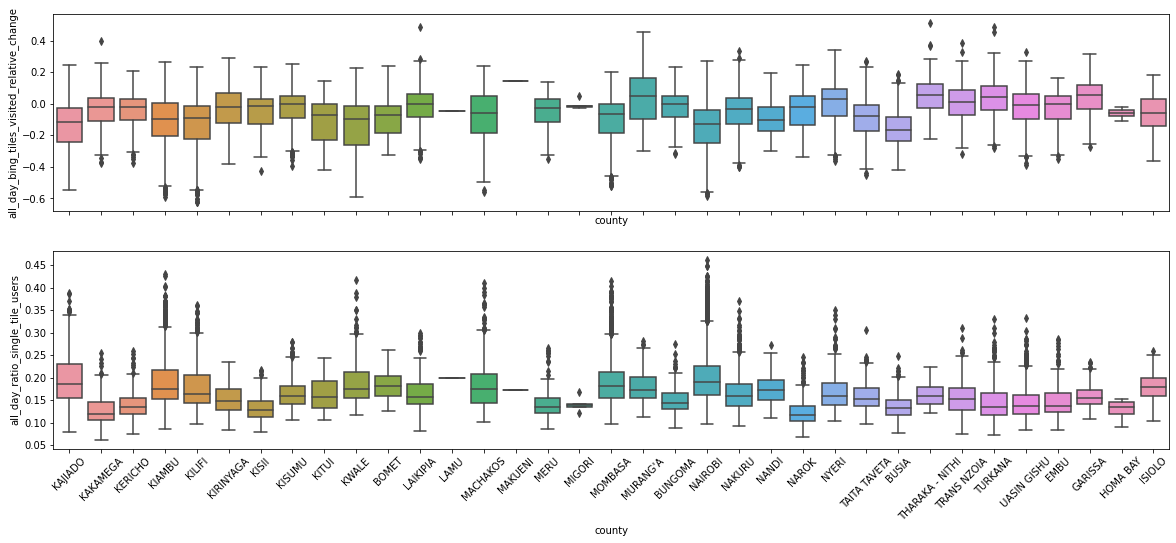

In [14]:
plt.rcParams["figure.figsize"] = 20,8
f, axarr = plt.subplots(2, sharex=True)
sns.set(font_scale = 0.5)
sns.boxplot(data=movement_economic_df, y='all_day_bing_tiles_visited_relative_change', x='county', ax=axarr[0])
sns.boxplot(data=movement_economic_df, y='all_day_ratio_single_tile_users', x='county', ax=axarr[1])

_ = plt.xticks(rotation=45)

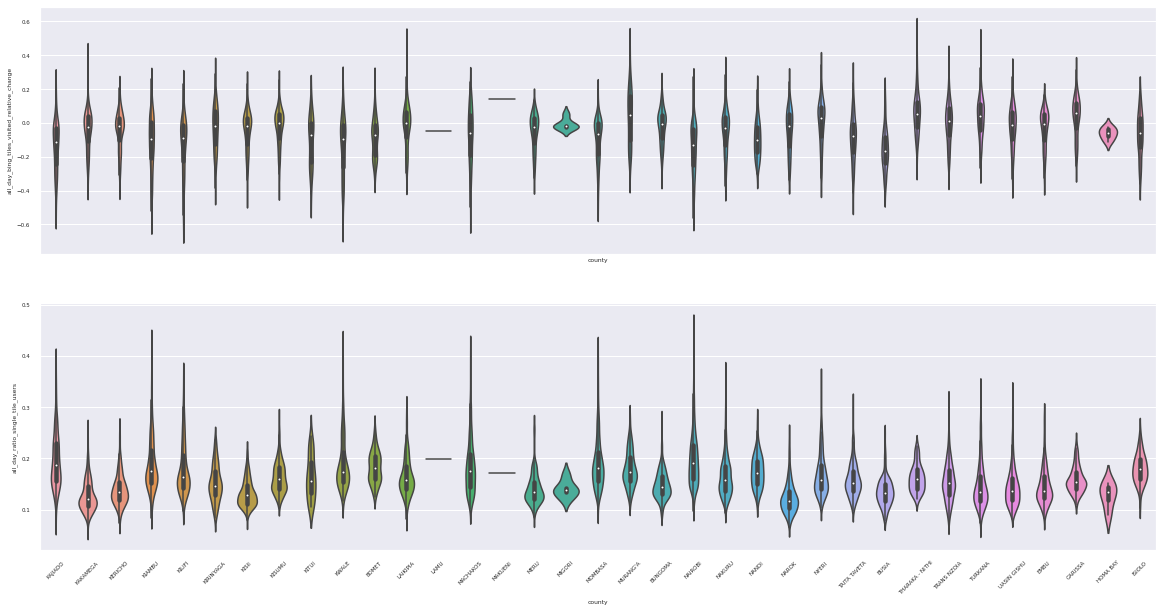

In [25]:
plt.rcParams["figure.figsize"] = 20,10
f, axarr = plt.subplots(2, sharex=True)
sns.set(font_scale = 0.5)
sns.violinplot(data=movement_economic_df, y='all_day_bing_tiles_visited_relative_change', x='county', ax=axarr[0])
sns.violinplot(data=movement_economic_df, y='all_day_ratio_single_tile_users', x='county', ax=axarr[1])

_ = plt.xticks(rotation=45)

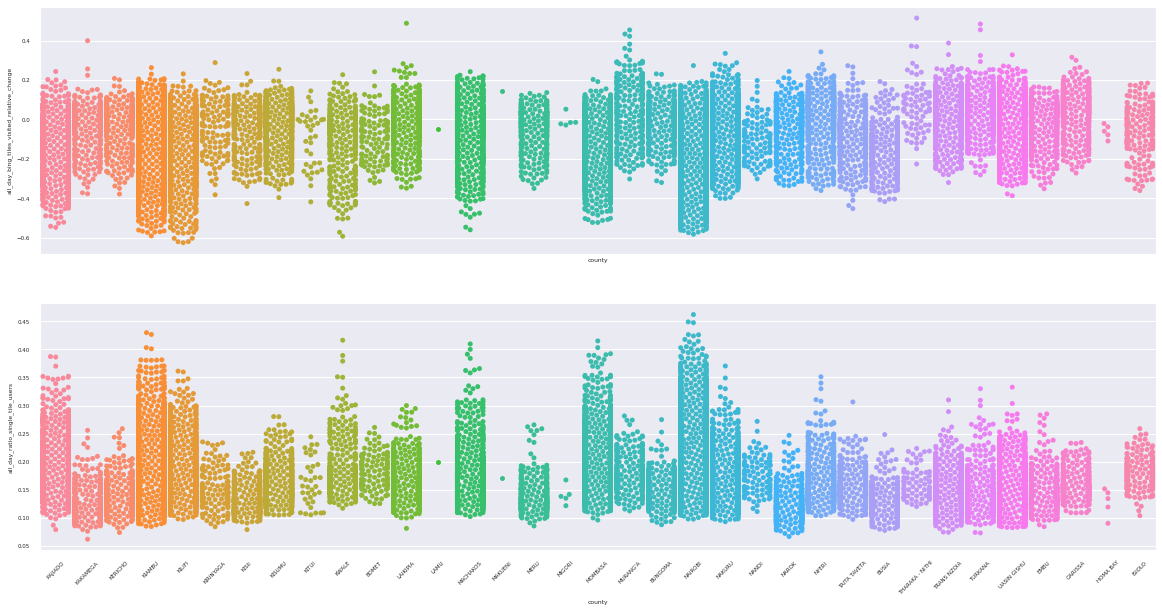

In [26]:
plt.rcParams["figure.figsize"] = 20,10
f, axarr = plt.subplots(2, sharex=True)
sns.set(font_scale = 0.5)
sns.swarmplot(data=movement_economic_df, y='all_day_bing_tiles_visited_relative_change', x='county', ax=axarr[0])
sns.swarmplot(data=movement_economic_df, y='all_day_ratio_single_tile_users', x='county', ax=axarr[1])

_ = plt.xticks(rotation=45)

## Distribution of economy

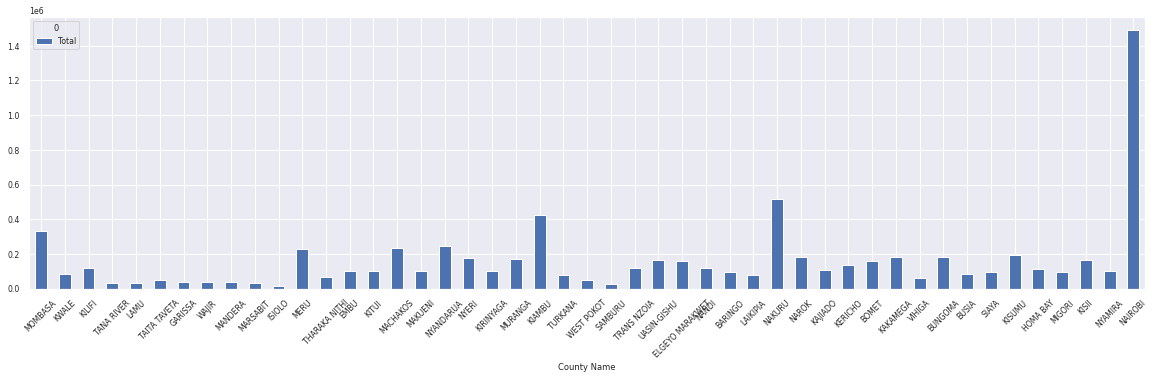

In [16]:
plt.rcParams["figure.figsize"] = 20,5
sns.set(font_scale = 0.7)
sliced_economy_df = economic_df[['County Name', 'Total']]
sliced_economy_df = sliced_economy_df[sliced_economy_df['County Name'].notnull()]
sliced_economy_df = sliced_economy_df.set_index('County Name')
sliced_economy_df.plot(kind='bar')
_ = plt.xticks(rotation=45)

## Distribution of population

In [17]:
sliced_population_df = population_df.merge(counties_df, left_on='region_name', right_on='county')[['region_name', 'total_population']]

In [18]:
sliced_population_df = sliced_population_df.groupby(by='region_name').agg('mean')

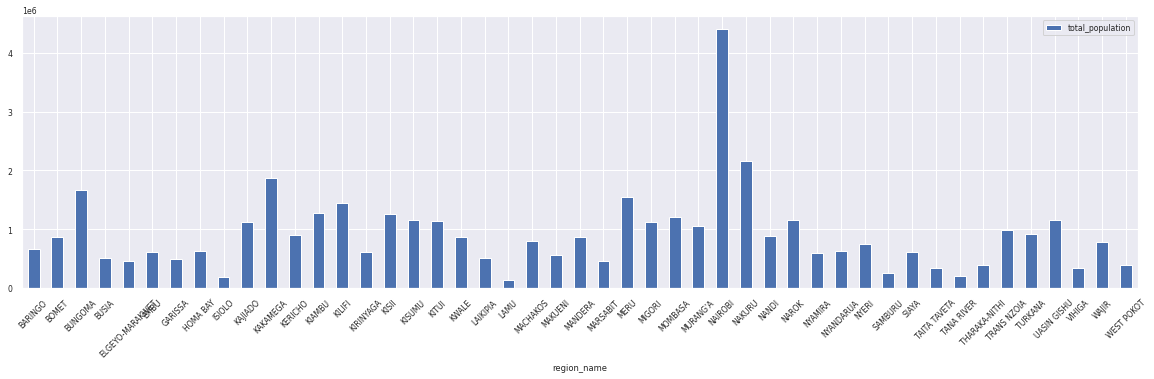

In [19]:
plt.rcParams["figure.figsize"] = 20,5
sns.set(font_scale = 0.7)
sliced_population_df.plot(kind='bar')
_ = plt.xticks(rotation=45)

## Relationship between indicators